#                                           assignment-1

In [28]:
#assignment is completed with the help of eda of iris dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haberman = pd.read_csv("haberman.csv")
import warnings 
warnings.filterwarnings("ignore") 

In [29]:
#how many data points and features?
print(haberman.shape)


(306, 4)


In [30]:
#column names
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [31]:
#introduction to dataset
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [32]:
haberman['status'] = haberman['status'].map({1:"survived", 2:"dead"})

In [33]:
haberman.tail()

,age,year,nodes,status
301,75,62,1,survived
302,76,67,0,survived
303,77,65,3,survived
304,78,65,1,dead
305,83,58,2,dead


In [34]:
#(Q)   value count of age of patient when dignosed with cancer ? 

haberman["age"].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

highest no. of patients diagnosed with cancer in dataset at age of 52

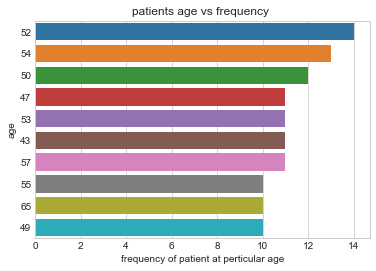

In [35]:
#https://github.com/kaustav1987/EDA-Car-Sales/blob/master/Car%20Sales%20EDA.ipynb
#which age span has higest patients
sns.countplot(y = 'age', data = haberman, order = haberman['age'].value_counts().nlargest(10).index)
plt.title("patients age vs frequency ")
plt.ylabel('age')
plt.xlabel('frequency of patient at perticular age');
plt.show()

top 10 age at which patient diagnosed with cancer

In [36]:
haberman['status'].value_counts()

survived    225
dead         81
Name: status, dtype: int64

haberman status
1 indicate: patient is alive for 5 years after operation or more
2 indicate: patient is dead
225 patients are alive after operation 

In [37]:
haberman['nodes'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

o nodes has maximum frequency

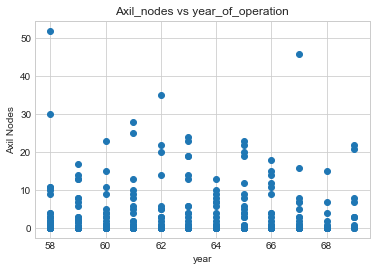

In [38]:
#scatter diagram showing correlation betn petients life cycle after treatement 
plt.scatter(haberman['year'],haberman['nodes'])
plt.xlabel('year')
plt.ylabel('Axil Nodes')
plt.title('Axil_nodes vs year_of_operation')
plt.show()

plot doesn't show any relation in number of nodes and age

In [39]:
#frequency of patients at perticualr age
haberman["year"].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

least no. of patients  detected in  year 1969
highest no. of patingts detected in year 1958

In [40]:
#year and patient freuquency
haberman["nodes"].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

patient with zero nodes are max.
#maybe due to erlier realisation of disease


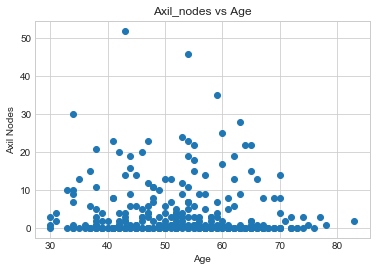

In [41]:
#plot showing year and cancer dignosed patient frequency
plt.scatter(haberman['age'],haberman['nodes'])
plt.xlabel('Age')
plt.ylabel('Axil Nodes')
plt.title('Axil_nodes vs Age')
plt.show()

not able to get  any concrete insights

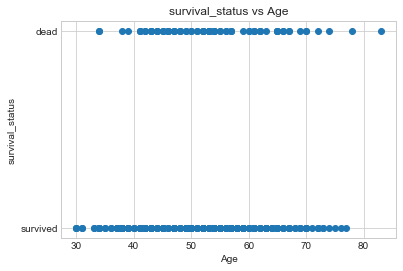

In [42]:
plt.scatter(haberman['age'],haberman['status'])
plt.xlabel('Age')
plt.ylabel('survival_status')
plt.title('survival_status vs Age')
plt.show()

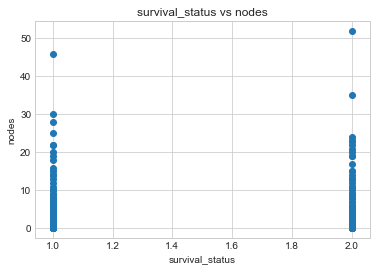

In [52]:
plt.scatter(haberman['status'],haberman['nodes'])
plt.xlabel('survival_status')
plt.ylabel('nodes')
plt.title('survival_status vs nodes')
plt.show()

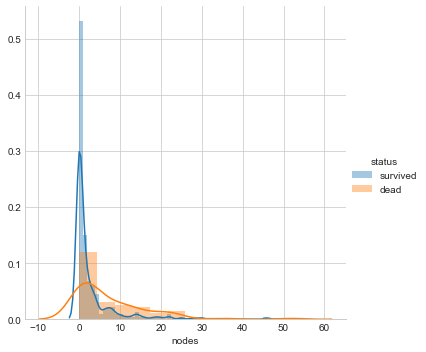

In [43]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

nodes density is higher in range of 0-10


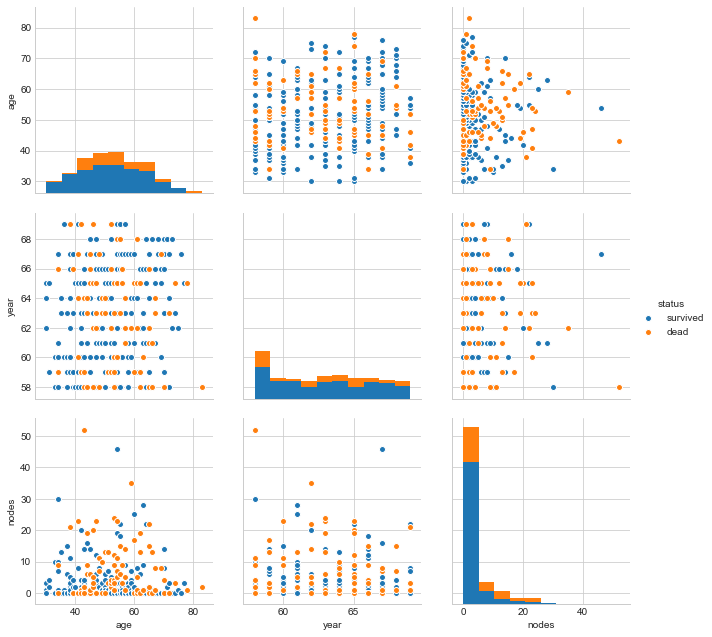

In [44]:
# pairwise scatter plot: Pair-Plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3);
plt.show()


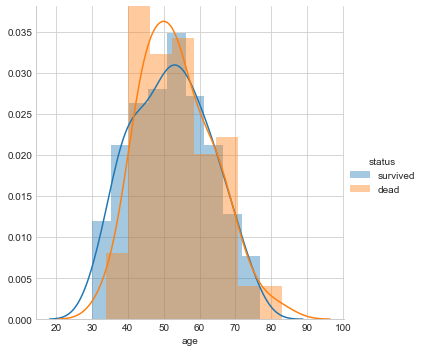

In [45]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();
#bit harder to analyse the plot and give satement about survival status as graph is cumbersome

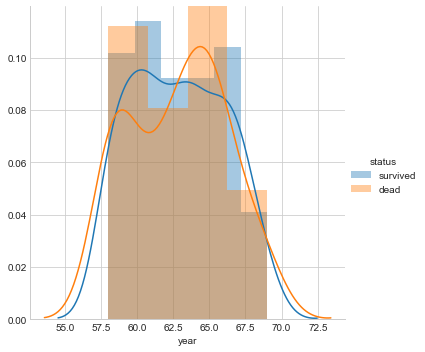

In [46]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();


#plot shows much higher rate of survival possibility of more than five year after treatement
overlap of data 

again convert survival status to 1 and 2 form as cdf does not take string form of data 

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


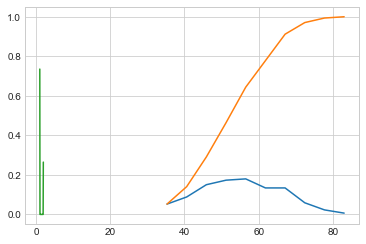

In [47]:
#Plot CDF of Haberman's Survival Data Set

haberman = pd.read_csv("haberman.csv")
counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman['status'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


not able to comprehend information with 100% assuarity but will like to know from applied ai  

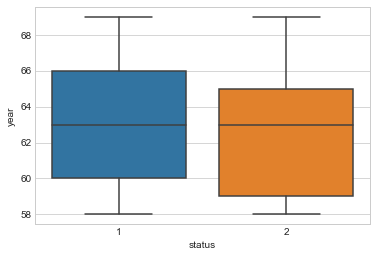

In [48]:
sns.boxplot(x='status',y='year', data=haberman)
plt.show()
#plot shows year in which patients detected 

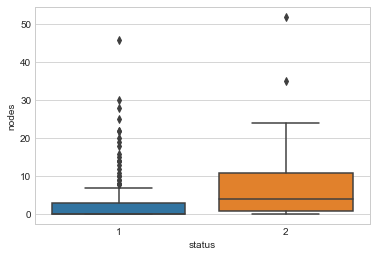

In [49]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

median no. of people with more nodes has better survival rate
span of no . of nodes is more for dead patients

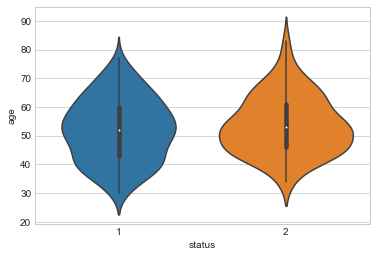

In [50]:
sns.violinplot(x='status', y='age', data = haberman, size = 8)
plt.show()

median age of survived and dead  patients is around 52 years 
dense distribution of patients in age range of 45 to 60

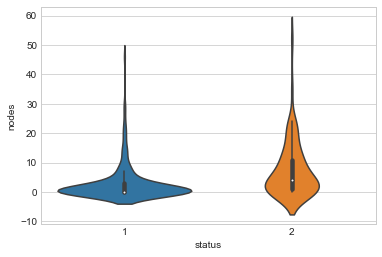

In [51]:
sns.violinplot(x='status', y='nodes', data = haberman, size = 8)
plt.show()

# conclusions:


1) highest no. of patients diagnosed with cancer in dataset at age of 52

2) 225 patients are alive after operation while 81 are dead

3) o nodes has maximum frequency

4) least no. of patients  detected in  year 1969
   highest no. of patingts detected in year 1958
